# Multiple Linear Regression



## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('50_Startups.csv')

##Data analysis

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Preparing Data as input and output

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(X.shape, y.shape)

(50, 4) (50,)


In [ ]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

## Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],
                      remainder='passthrough')
X=np.array (ct.fit_transform(X))

In [ ]:
print(X.shape)

(50, 6)


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 ,
                                                    random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)

[103015.20159795 132582.27760816 132447.73845175  71976.09851258
 178537.48221057 116161.24230167  67851.69209676  98791.73374687
 113969.43533014 167921.06569552]


## Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [ ]:
print(regressor.predict([[1,0,0,160000,130000,300000]]))

[181566.92389386]


##Getting the final linear regression equation with the values of the coefficients

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)


[ 8.66383692e+01 -8.72645791e+02  7.86007422e+02  7.73467193e-01
  3.28845975e-02  3.66100259e-02]
42467.52924853278


## variance score: 1 means perfect prediction

In [ ]:
print('Variance score: {}'.format(regressor.score(X_test, y_test)))

Variance score: 0.9347068473282546


In above example, we determine accuracy score using Explained Variance Score.

We define:
**explained_variance_score = 1 – Var{y – y’}/Var{y}**

where
* y’ is the estimated target output,
* y the corresponding (correct) target output
* Var is Variance, the square of the standard deviation.

***The best possible score is 1.0, lower values are worse.**

# plot for residual error

## setting plot style

In [ ]:
plt.style.use('fivethirtyeight')

## plotting residual errors in training data

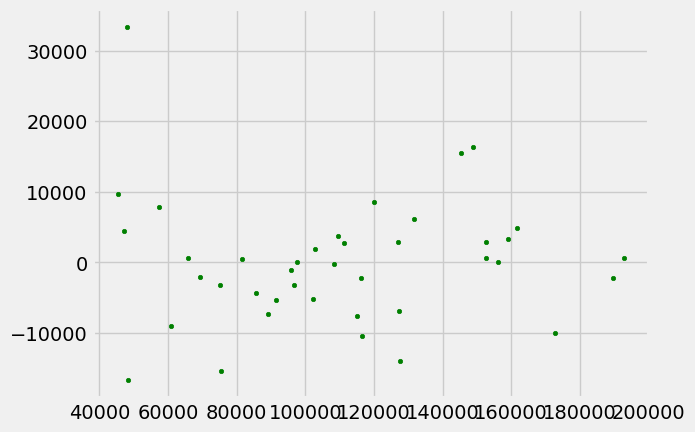

In [ ]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')

### Plotting residual errors in test data

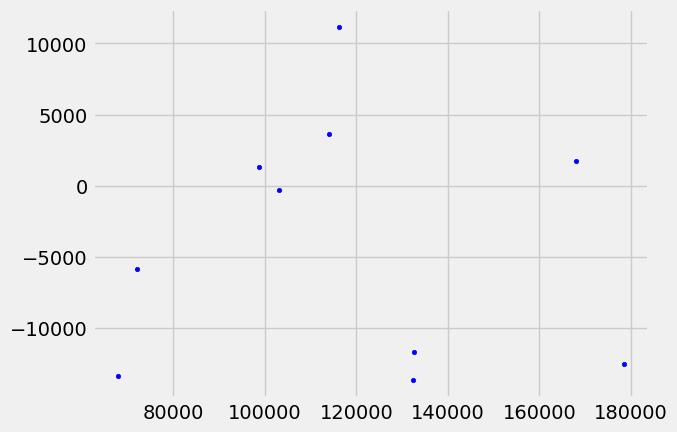

In [ ]:
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')

### Plotting line for zero residual error

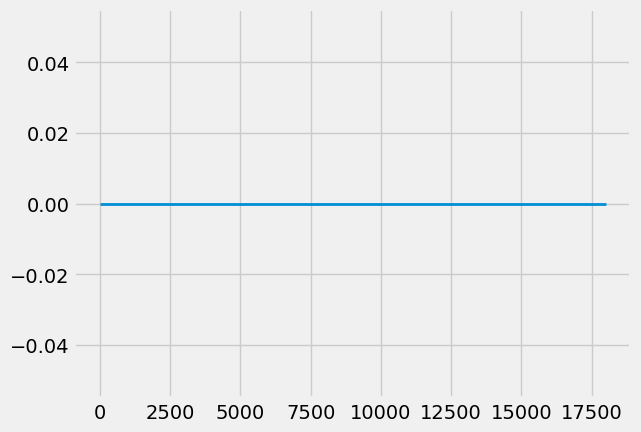

In [ ]:
plt.hlines(y = 0, xmin = 0, xmax = 18000, linewidth = 2)

## plotting legend

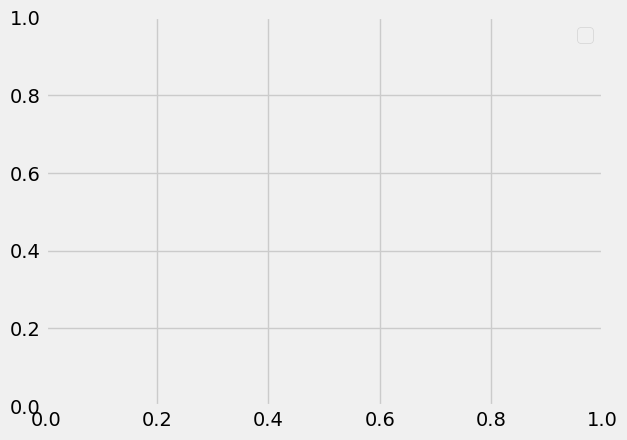

In [ ]:
plt.legend(loc = 'upper right')

### Plot title

Text(0.5, 1.0, 'Residual errors')

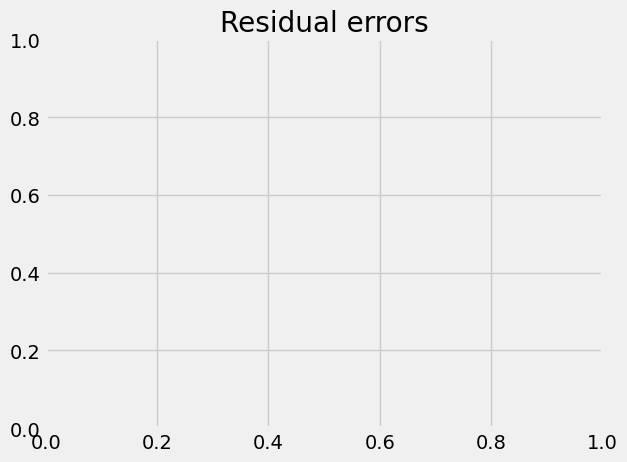

In [ ]:
plt.title("Residual errors")

### Function to show plot

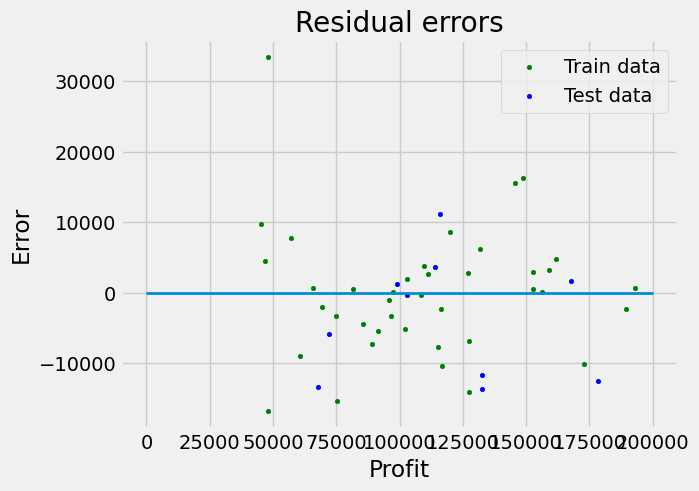

In [ ]:
plt.style.use('fivethirtyeight')
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train,color = "green", s = 10, label = 'Train data')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test,color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 200000, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.xlabel("Profit")
plt.ylabel("Error")
plt.show()

# Find the R^2

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9347068473282546


# Test Your Knowledge

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 15 )

In [ ]:
print(X_train)

[[0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 0.0 22177.74 154806.14 28334.72]
 [1.0 0.0 0.0 0.0 135426.92 0.0]
 [1.0 0.0 0.0 0.0 116983.8 45173.06]
 [0.0 1.0 0.0 73994.56 122782.75 303319.26]
 [1.0 0.0 0.0 64664.71 139553.16 137962.62]
 [1.0 0.0 0.0 23640.93 96189.63 148001.11]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 0.0 1315.46 115816.21 297114.46]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 0.0 38558.51 82982.09 174999.3]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 77044.01 99281.34 140574.81]
 [1.0 0.0 0.0 28754.33 118546.05 172795.67]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [1.0 0.0 0.0 46426.07 157693.92 210797.67]
 [0.0 0.0 1.0 1000.23 124153.04 1903.93]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 0.0 1.0 542.05 51743.15 0.0]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [0.0 1.0 0.0 142107.34 9139

In [ ]:
print(X_test)

[[0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [1.0 0.0 0.0 44069.95 51283.14 197029.42]
 [0.0 1.0 0.0 27892.92 84710.77 164470.71]
 [0.0 1.0 0.0 75328.87 144135.98 134050.07]
 [0.0 0.0 1.0 20229.59 65947.93 185265.1]
 [0.0 0.0 1.0 15505.73 127382.3 35534.17]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [0.0 1.0 0.0 28663.76 127056.21 201126.82]]


In [ ]:
print(y_train)

[132602.65 126992.93 118474.03 149759.96  65200.33  42559.73  14681.4
 110352.25 107404.34  71498.49 191050.39  49490.75 191792.06  81005.76
 124266.9  108552.04  78239.91 156122.51  96712.8   64926.08 134307.35
  35673.41 122776.86 166187.94 129917.04 146121.95  97427.84 108733.99
  97483.56 125370.37 101004.64 111313.02 144259.4  155752.6  105008.31
 103282.38 192261.83 156991.12 141585.52 152211.77]


In [ ]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
tmreg = LinearRegression()
tmreg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Check the attributes of our model
print("Cofficient of Model = " ,tmreg.coef_)
print("Intercept of Model = " ,tmreg.intercept_)

Cofficient of Model =  [ 1.51888889e+03  3.47937339e+02 -1.86682623e+03  8.43123360e-01
  1.01970647e-02  1.96393240e-02]
Intercept of Model =  42816.54216345826


In [ ]:
print("Accuracy of the Model = " , tmreg.score(X_train , y_train) )

Accuracy of the Model =  0.9553375659204385


In [ ]:
# Predicting Test Data
tyhat = tmreg.predict(X_test)
print(tyhat)

[ 84648.67285513  85884.29749311  70775.54670027 110778.42615571
  62316.71246189  56019.75173833 171409.35338586  95218.89156002
  98402.43134698  72577.16032226]


In [ ]:
# Making the simple prediction ( R&D = 300000 , Administration = 160000 , Marketing = 200000 , State= 'Flroida')
tmreg.predict([[1,0,0,300000,160000,200000]])

array([302831.83423045])